<a href="https://colab.research.google.com/github/SimiMaithani/Simi_INFO5731_Fall2021/blob/main/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [ ]:
# Importing the training and test data and saving in dataframes
train_df = pd.read_csv('train.csv', engine='python')
train_df

,sentiment,imdb_reviews
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...
...,...,...
6915,1,"painful , horrifying and oppressively tragic ,..."
6916,0,take care is nicely performed by a quintet of ...
6917,0,"the script covers huge , heavy topics in a bla..."
6918,0,a seriously bad film with seriously warped log...


In [ ]:
test_df = pd.read_csv('test.csv', engine='python')
test_df

,sentiment,imdb_testreviews
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the eag..."
2,0,"gangs of new york is an unapologetic mess , wh..."
3,0,"we never really feel involved with the story ,..."
4,1,this is one of polanski 's best films .
...,...,...
1816,0,"an often-deadly boring , strange reading of a ..."
1817,0,the problem with concept films is that if the ...
1818,0,"safe conduct , however ambitious and well-inte..."
1819,0,"a film made with as little wit , interest , an..."


In [ ]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

#Performing all data cleaning inside one function
def reviews_clean(imdb_reviews):
    imdb_reviews ="".join([word.lower() for word in imdb_reviews if word not in string.punctuation])
    imdb_reviews= re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", imdb_reviews)
    tokens= re.split('\W+',imdb_reviews)
    imdb_reviews= [wl.lemmatize(word) for word in tokens if word not in stopword]
    return imdb_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Transforming the data using vectors 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = reviews_clean)
X_tfidf = tfidf_vect.fit_transform(train_df['imdb_reviews'])

# Saving the tf-idf values in a dataframe
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
print(X_tfidf.shape)

(6920, 13162)


In [ ]:
# Transforming the test data values using vectorizer
X_test_tfidf = tfidf_vect.transform(test_df['imdb_testreviews'])
print(X_test_tfidf.shape)

(1821, 13162)


In [ ]:
# Algorithms:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

# (1) MultinominalNB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

mnb = MultinomialNB()

# Defining the train data: 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train_df['sentiment'].values,test_size=0.2, random_state=42)

# Fitting the model
model_mnb = mnb.fit(x_train,y_train)
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s \n' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

# Cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=10)
print("MultinominalNB(cross-validation score):",scores.mean())


Accuracy 0.7984104046242775 

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.81      0.80      0.80      1384
weighted avg       0.81      0.80      0.80      1384

MultinominalNB(cross-validation score): 0.7095141278281722


In [ ]:
# (2) SVM
from sklearn.svm import LinearSVC

svm = LinearSVC()
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s \n' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

# Cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("SVM(cross-validation score):",scores.mean())

Accuracy 0.7976878612716763 

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       671
           1       0.78      0.84      0.81       713

    accuracy                           0.80      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.80      0.80      0.80      1384

SVM(cross-validation score): 0.7124178917735376


In [ ]:
# (3) KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
model_knn = knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print('Accuracy %s \n' % accuracy_score(y_pred_knn,y_test))
print(classification_report(y_test,y_pred_knn))

# Cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x_test, y_test, cv=10)
print("KNN(cross-validation score):",scores.mean())

Accuracy 0.7333815028901735 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       671
           1       0.73      0.76      0.75       713

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384

KNN(cross-validation score): 0.6625638619539151


In [ ]:
# (4) Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print('Accuracy %s \n' % accuracy_score(y_pred_dt,y_test))
print(classification_report(y_test,y_pred_dt))

# Cross-validation score
scores = cross_val_score(dt, x_test, y_test, cv=10)
print("Decision tree(cross-validation score):",scores.mean())


Accuracy 0.6394508670520231 

              precision    recall  f1-score   support

           0       0.64      0.58      0.61       671
           1       0.64      0.70      0.67       713

    accuracy                           0.64      1384
   macro avg       0.64      0.64      0.64      1384
weighted avg       0.64      0.64      0.64      1384

Decision tree(cross-validation score): 0.5938901053070587


In [ ]:
# (5) Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

model_rf = rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
print('Accuracy %s \n' % accuracy_score(y_pred_rf,y_test))
print(classification_report(y_test,y_pred_rf))

#Cross-validation score
scores = cross_val_score(rf, x_test, y_test, cv=10)
print("Random forest(cross-validation score):",scores.mean())

Accuracy 0.7283236994219653 

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       671
           1       0.71      0.81      0.75       713

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384

Random forest(cross-validation score): 0.6697581065582316


In [ ]:
# (6) XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_xgb = xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('Accuracy %s \n' % accuracy_score(y_pred_xgb,y_test))
print(classification_report(y_test,y_pred_xgb))

#Cross-validation score
scores = cross_val_score(xgb, x_test, y_test, cv=10)
print("XGBoost(Cross-validation score):",scores.mean())

Accuracy 0.6488439306358381 

              precision    recall  f1-score   support

           0       0.78      0.38      0.51       671
           1       0.61      0.90      0.73       713

    accuracy                           0.65      1384
   macro avg       0.70      0.64      0.62      1384
weighted avg       0.69      0.65      0.62      1384

XGBoost(Cross-validation score): 0.6184600145970182


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [3]:
#Write your code here.
import pandas as pd
df = pd.read_csv("Amazon_Unlocked_Mobile2.csv", engine = 'python')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
# Data-cleaning
#lower case
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
#Removing punctuation
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
#Removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Lemmatize
from textblob import Word
import nltk
nltk.download('wordnet')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Reviews'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
Name: Reviews, dtype: object

In [5]:
df['Reviews'].head()

0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
Name: Reviews, dtype: object

In [6]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))
names= tfidf_vect.get_feature_names()

In [7]:
# k-means clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 8 ,init='k-means++', n_jobs = -1,max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 14, 1: 75, 2: 33, 3: 44, 4: 47, 5: 240, 6: 534, 7: 12})

In [8]:
# cluster-center
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.25515792e-03, 1.27035052e-03, ...,
        1.31505175e-03, 0.00000000e+00, 0.00000000e+00],
       [7.02527553e-04, 9.99011132e-05, 5.34308862e-03, ...,
        3.03682998e-04, 2.48756423e-04, 3.16791660e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['Reviews'].values)
bow.shape

(999, 3472)

In [10]:
# Top words in each cluster
topn_features = 8
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(7):
    key_features = [names[i] for i in centroids[cluster_num, :topn_features]]
    print('Top words in CLUSTER  '+ str(cluster_num+1) + ":" + str(key_features))

Top words in CLUSTER  1:['excelent', 'thank', 'seller', 'product', 'famous', 'fastest', 'faster', 'fast']
Top words in CLUSTER  2:['great', 'phone', 'work', 'easy', 'love', 'lousy', 'use', 'didnt']
Top words in CLUSTER  3:['excelente', 'telefono', 'producto', '发哥版', 'fancy', 'fasti', 'fastest', 'faster']
Top words in CLUSTER  4:['excellent', 'product', 'recommend', 'condition', 'arrived', 'thank', 'seller', 'much']
Top words in CLUSTER  5:['good', 'phone', 'price', 'mobile', 'cell', 'product', 'work', 'thanks']
Top words in CLUSTER  6:['phone', 'like', 'card', 'good', 'sim', 'screen', 'use', 'review']
Top words in CLUSTER  7:['phone', 'work', 'good', 'ok', 'bad', 'love', 'working', 'use']


In [11]:
# DBSCAN clustering

phone_reviews=[]
for i in df['Reviews']:
    phone_reviews.append(str(i).split())
import gensim
#Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(phone_reviews, size=100, workers=4)

In [12]:
import numpy as np
# the avg-w2v for each sentence/review is stored in this list
vectors = []
for i in phone_reviews:
    vector = np.zeros(100)
    # word vectors are of zero length
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [13]:
# Computing 200th Nearest neighbour distance
from sklearn.cluster import DBSCAN
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]

vectors.shape

neighbor = []
for val in vectors[:400]:
    neighbor.append(compute200thnearestneighbour(val, vectors[:400]))
neighbor.sort()

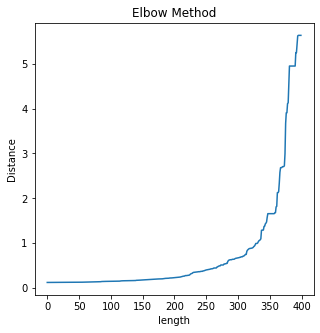

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
# Plotting for the Elbow Method :
plt.figure(figsize=(5,5))
plt.title("Elbow Method")
plt.plot([x for x in range(len(neighbor))], neighbor)
plt.xlabel("length")
plt.ylabel("Distance")
plt.show()

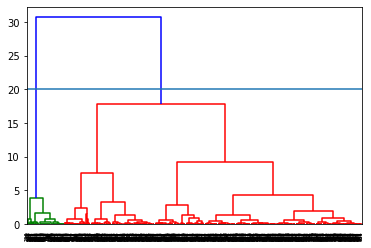

In [15]:
#Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(vectors)

In [20]:
# Giving Labels/assigning a cluster to each point/text 
df['AVG-W2V Clus Label'] = cluster.labels_
df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,0


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)
# K-means clustering is an unsupervised learning algorithm in which data that have not been labeled are grouped 
# together based on the similarities between each other. It is an iterative process in which first random k 
# values are determined. A trial and error can be used while determining the k values and then as a greater number of models are run the values of k can be changed based on what the model has learned
# In hierachical clustering the data are grouped in layers of hierarchy. All the data points in the beginning are assigned
# to a cluster of their own. The 2 clusters that are the closest are then combined to form one cluster. This process repets
# and terminates when there is only cluster left. DBSCAN stands for DBSCAN stands for density-based spatial clustering
# of applications with noise. This type of clustering is capable of finding not only the random shaped clusters but
# also that ones that contain outliers. They focus on density and thus their main aim is to seperate areas of high 
# density from areas of low density. Out of the k-means and dbscan clustering k-means clustering is more capable of 
# dealing with large data.
